<a href="https://colab.research.google.com/github/edolahartu/Final-Project-Fake-News/blob/main/Visualisasi_Final_Project_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & dataset

In [6]:
import pandas as pd
import numpy as np


In [91]:
import nltk
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [36]:
!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

In [1]:
from google.colab import file


In [22]:
data = pd.read_csv('/content/news.csv')
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

# Data Cleaning

In [40]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)

    return result

# Real-Fake Comparasion

In [31]:
data['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

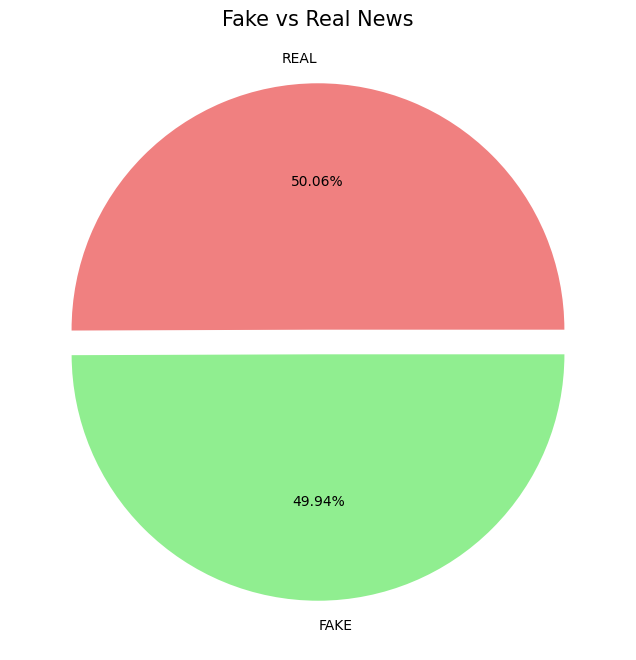

In [90]:
labels = data['label'].value_counts()
plt.figure(figsize=(10,8))
plt.pie(labels.values, labels=labels.index, autopct='%.2f%%', explode=([0.05]*len(labels.index)), colors=['lightcoral','lightgreen'])
plt.title('Fake vs Real News', fontsize=15)
plt.show()

In [43]:

data['clean_title'] = data['title'].apply(preprocess)
data['clean_title'].head()

0                               [smell, hillary, fear]
1    [watch, exact, moment, paul, ryan, committed, ...
2                    [kerry, paris, gesture, sympathy]
3    [bernie, supporters, twitter, erupt, anger, dn...
4                [battle, new, york, primary, matters]
Name: clean_title, dtype: object

In [46]:
data['clean_joined_title']=data['clean_title'].apply(lambda x:" ".join(x))
data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE   
4  It's primary day in New York and front-runners...  REAL   

                                         clean_title  \
0                             [smell, hillary, fear]   
1  [watch, exact, moment, paul, ryan, committed, ...   
2                  [kerry, paris, gesture, sympathy]   
3  [bernie, supporters, twitter, erupt, anger, dn...   
4              [battle, new, york, primary, matters]   

                                  clean_joined_title  
0                                 smell hillary fear  
1  watch exact moment paul ryan committed politic...  
2                       kerry paris gesture sympathy  
3  bernie supporters twitter erupt anger dnc trie...  
4                    battle new york primary matters

In [64]:
df = data.copy()
df['label'] = df['label'].replace({'FAKE': 0, 'REAL': 1})
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text  label  \
0  Daniel Greenfield, a Shillman Journalism Fello...      0   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0   
2  U.S. Secretary of State John F. Kerry said Mon...      1   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0   
4  It's primary day in New York and front-runners...      1   

                                         clean_title  \
0                             [smell, hillary, fear]   
1  [watch, exact, moment, paul, ryan, committed, ...   
2                  [kerry, paris, gesture, sympathy]   
3  [bernie, supporters, twitter, erupt, anger, dn...   
4              [battle, new, york, primary, matters]   

                                  clean_joined_title  
0                                 smell hillary fear  
1  watch exact moment paul ryan committed politic...  
2                       kerry paris gesture sympathy  
3  bernie supporters twitter erupt anger dnc trie...  
4                    battle new york primary matters

# Words Cloud For Title

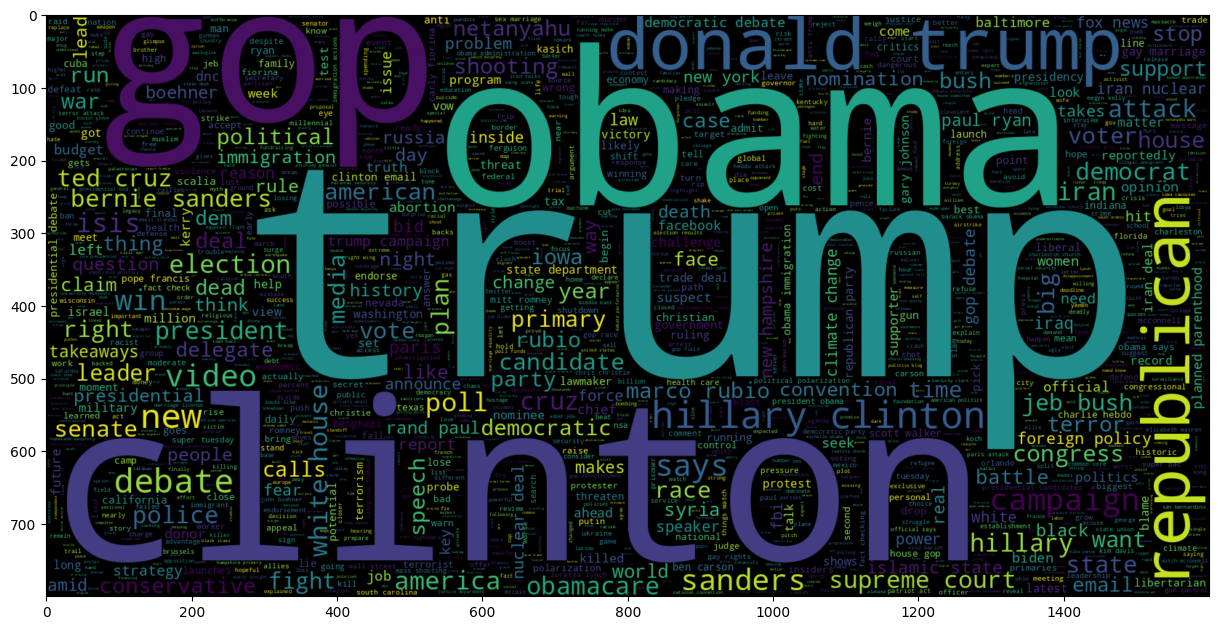

In [79]:
# Words Cloud For Real News

plt.figure(figsize = (15,15))
wc_real = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 1].clean_joined_title))
# plt.imshow(wc_real, interpolation = 'bilinear')

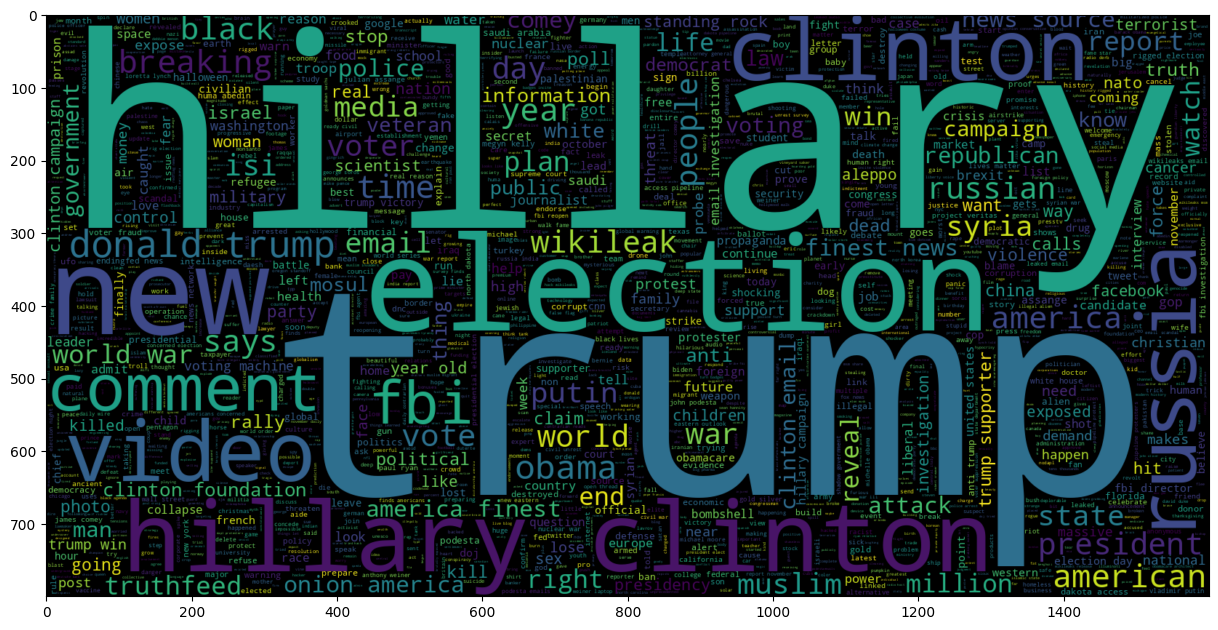

In [80]:
# Words Cloud For Fake news

plt.figure(figsize = (15,15))
wc_fake = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 0].clean_joined_title))
plt.imshow(wc_fake, interpolation = 'bilinear')

# Words Cloud For Tex


In [81]:
df['clean_text'] = df['text'].apply(preprocess)
df['clean_joined_text']=df['clean_text'].apply(lambda x:" ".join(x))

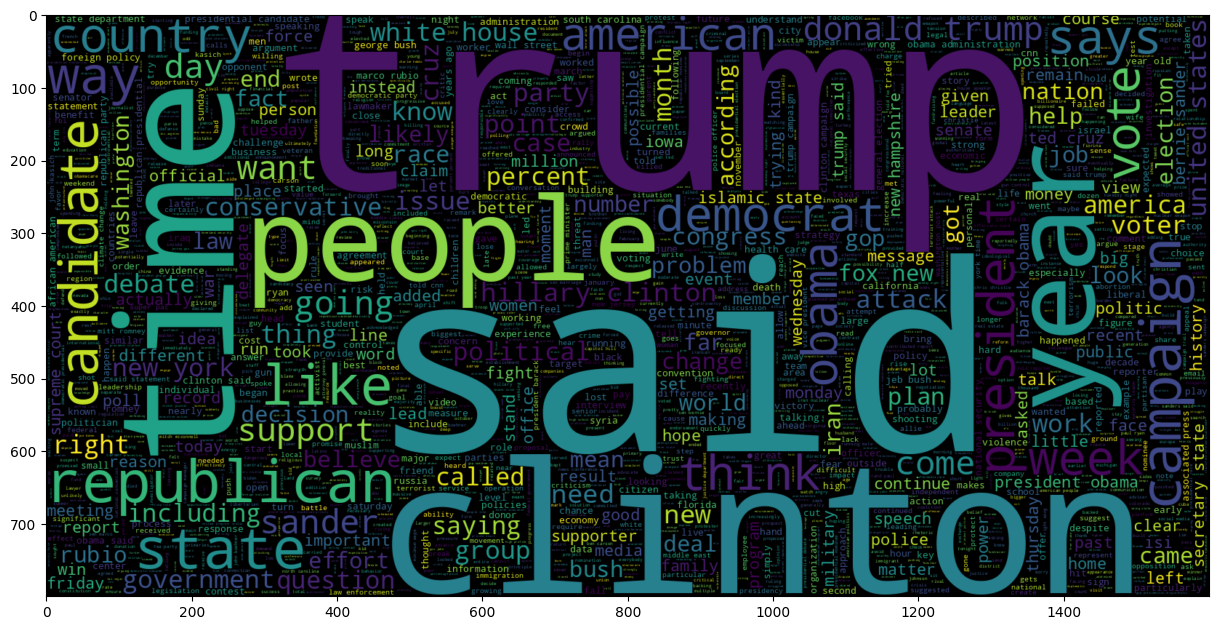

In [85]:
plt.figure(figsize = (15,15))
wc_real_text = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 1].clean_joined_text))
plt.imshow(wc_real_text, interpolation = 'bilinear')

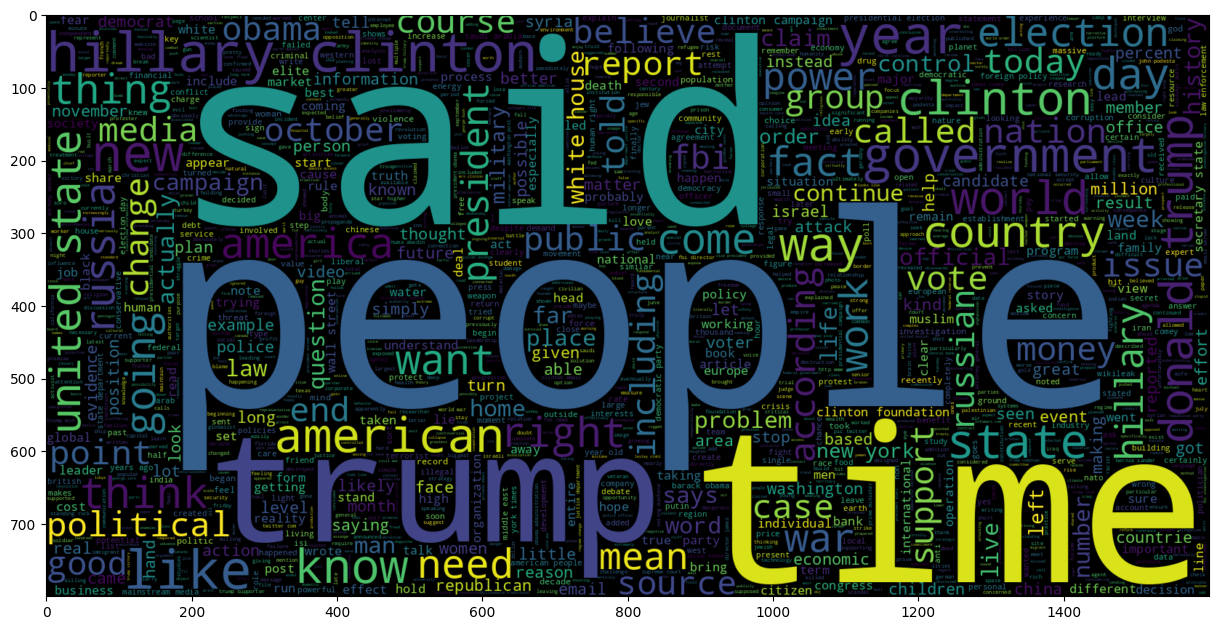

In [89]:
plt.figure(figsize = (15,15))
wc_fake_text = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.label == 0].clean_joined_text))
plt.imshow(wc_fake_text, interpolation = 'bilinear')

In [94]:
df

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  label  \
0     Daniel Greenfield, a Shillman Journalism Fello...      0   
1     Google Pinterest Digg Linkedin Reddit Stumbleu...      0   
2     U.S. Secretary of State John F. Kerry said Mon...      1   
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...      0   
4     It's primary day in New York and front-runners...      1   
...                                                 ...    ...   
6330  The State Department told the Republican Natio...      1   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...      0   
6332   Anti-Trump Protesters Are Tools of the Oligar...      0   
6333  ADDIS ABABA, Ethiopia —President Obama convene...      1   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...      1   

                                            clean_title  \
0                                [smell, hillary, fear]   
1     [watch, exact, moment, paul, ryan, committed, ...   
2                     [kerry, paris, gesture, sympathy]   
3     [bernie, supporters, twitter, erupt, anger, dn...   
4                 [battle, new, york, primary, matters]   
...                                                 ...   
6330  [state, department, says, emails, clinton, spe...   
6331                [pbs, stand, plutocratic, pentagon]   
6332  [anti, trump, protesters, tools, oligarchy, in...   
6333  [ethiopia, obama, seeks, progress, peace, secu...   
6334   [jeb, bush, suddenly, attacking, trump, matters]   

                                     clean_joined_title  \
0                                    smell hillary fear   
1     watch exact moment paul ryan committed politic...   
2                          kerry paris gesture sympathy   
3     bernie supporters twitter erupt anger dnc trie...   
4                       battle new york primary matters   
...                                                 ...   
6330    state department says emails clinton specialist   
6331                     pbs stand plutocratic pentagon   
6332  anti trump protesters tools oligarchy information   
6333  ethiopia obama seeks progress peace security e...   
6334          jeb bush suddenly attacking trump matters   

                                             clean_text  \
0     [daniel, greenfield, shillman, journalism, fel...   
1     [google, pinterest, digg, linkedin, reddit, st...   
2     [secretary, state, john, kerry, said, monday, ...   
3     [kaydee, king, kaydeeking, november, lesson, t...   
4     [primary, day, new, york, runners, hillary, cl...   
...                                                 ...   
6330  [state, department, told, republican, national...   
6331  [pbs, stand, plutocratic, pentagon, posted, oc...   
6332  [anti, trump, protesters, tools, oligarchy, re...   
6333  [addis, ababa, ethiopia, president, obama, con...   
6334  [jeb, bush, suddenly, attacking, trump, matter...   

                                      clean_joined_text  
0     daniel greenfield shillman journalism fellow f...  
1     google pinterest digg linkedin reddit stumbleu...  
2     secretary state john kerry said monday stop pa...  
3

# Sentiment Analysis

In [92]:
def analyze_sentiment(text):
    if not isinstance(text, str):
        raise ValueError("Input must be a string")

    sia = SentimentIntensityAnalyzer()
    score = sia.polarity_scores(text)

    if score["compound"] >= 0.05:
        return "positive"
    elif score["compound"] <= -0.05:
        return "negative"
    else:
        return "neutral"

In [104]:
df["title_Sentiment"] = df["title"].apply(analyze_sentiment)

In [105]:
df["text_Sentiment"] = df["text"].apply(analyze_sentiment)

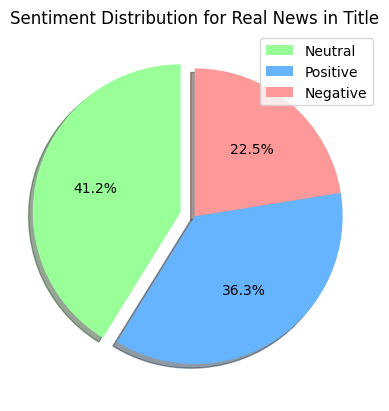

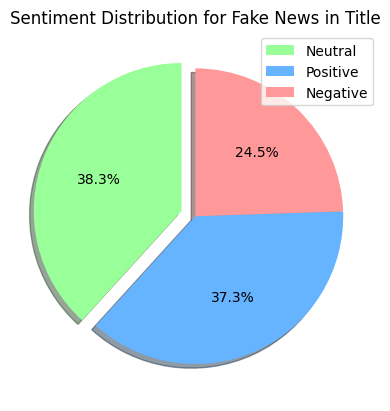

In [106]:
plt.pie(
    df[df["label"] == 0]["title_Sentiment"].value_counts(),
    autopct="%1.1f%%",
    colors=["#99ff99", "#66b3ff", "#ff9999"],
    startangle=90,
    explode=(0.1, 0, 0),
    shadow=True,
)
plt.legend(labels=["Neutral", "Positive", "Negative"])
plt.title("Sentiment Distribution for Real News in Title")
plt.show()
plt.clf()
plt.pie(
    df[df["label"] == 1]["title_Sentiment"].value_counts(),
    autopct="%1.1f%%",
    colors=["#99ff99", "#66b3ff", "#ff9999"],
    startangle=90,
    explode=(0.1, 0, 0),
    shadow=True,
)
plt.legend(labels=["Neutral", "Positive", "Negative"])
plt.title("Sentiment Distribution for Fake News in Title")
plt.show()

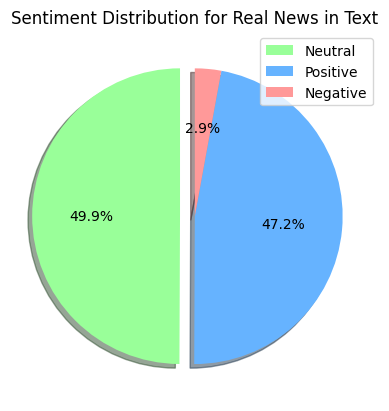

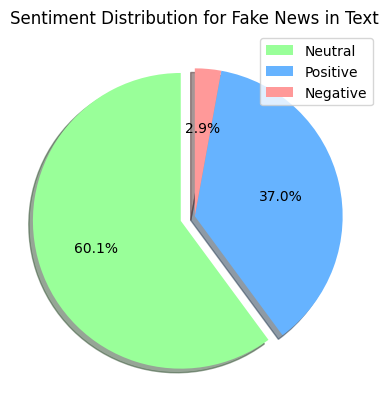

In [107]:
plt.pie(
    df[df["label"] == 0]["text_Sentiment"].value_counts(),
    autopct="%1.1f%%",
    colors=["#99ff99", "#66b3ff", "#ff9999"],
    startangle=90,
    explode=(0.1, 0, 0),
    shadow=True,
)
plt.legend(labels=["Neutral", "Positive", "Negative"])
plt.title("Sentiment Distribution for Real News in Text")
plt.show()
plt.clf()
plt.pie(
    df[df["label"] == 1]["text_Sentiment"].value_counts(),
    autopct="%1.1f%%",
    colors=["#99ff99", "#66b3ff", "#ff9999"],
    startangle=90,
    explode=(0.1, 0, 0),
    shadow=True,
)
plt.legend(labels=["Neutral", "Positive", "Negative"])
plt.title("Sentiment Distribution for Fake News in Text")
plt.show()

In [114]:
df

Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
...          ...                                                ...   
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  label  \
0     Daniel Greenfield, a Shillman Journalism Fello...      0   
1     Google Pinterest Digg Linkedin Reddit Stumbleu...      0   
2     U.S. Secretary of State John F. Kerry said Mon...      1   
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...      0   
4     It's primary day in New York and front-runners...      1   
...                                                 ...    ...   
6330  The State Department told the Republican Natio...      1   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...      0   
6332   Anti-Trump Protesters Are Tools of the Oligar...      0   
6333  ADDIS ABABA, Ethiopia —President Obama convene...      1   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...      1   

                                     clean_joined_title  \
0                                    smell hillary fear   
1     watch exact moment paul ryan committed politic...   
2                          kerry paris gesture sympathy   
3     bernie supporters twitter erupt anger dnc trie...   
4                       battle new york primary matters   
...                                                 ...   
6330    state department says emails clinton specialist   
6331                     pbs stand plutocratic pentagon   
6332  anti trump protesters tools oligarchy information   
6333  ethiopia obama seeks progress peace security e...   
6334          jeb bush suddenly attacking trump matters   

                                      clean_joined_text title_Sentiment  \
0     daniel greenfield shillman journalism fellow f...        negative   
1     google pinterest digg linkedin reddit stumbleu...        negative   
2     secretary state john kerry said monday stop pa...        positive   
3     kaydee king kaydeeking november lesson tonight...        negative   
4     primary day new york runners hillary clinton d...        negative   
...                                                 ...             ...   
6330  state department told republican national comm...         neutral   
6331  pbs stand plutocratic pentagon posted oct wiki...         neutral   
6332  anti trump protesters tools oligarchy reform p...        negative   
6333  addis ababa ethiopia president obama convened ...        positive   
6334  jeb bush suddenly attacking trump matters jeb ...        negative   

     text_Sentiment  
0          negative  
1          positive  
2          positive  
3          negative  
4          positive  
...             ...  
6330       positive  
6331       negative  
6332       negative  
6333       positive  
6334       positive  

[6335 rows x 8 columns]